<img src="../biospytial.png" alt="Drawing" style="width: 500px;"/>

In [1]:
## Import modules and libraries
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import numpy as np
import matplotlib.pyplot as plt

# Mosquitos, the environment and related species

<img src="mosquito2.jpg" alt="Drawing" style="width: 500px;"/>

## Load Biospytial Modules

In [2]:
## Import modules
from drivers.tree_builder import TreeNeo
from drivers.graph_models import Order, Family, graph, pickNode
from traversals.strategies import sumTrees
from traversals.sampling import UniformRandomSampleForest

## Let´s pick the Mosquito Node
Remember that Mosquitos are all from the Family *Culicidae*
<img src="mosquito3.jpg" alt="taken from: http://www.insectsexplained.com/11Diptera.htm" style="width: 500px;"/>

In [3]:
mosquitos = pickNode(Family,"Culicidae")

In [4]:
mosquitos

<TreeNode type: Family id = 3346 name: Culicidae>

In [5]:
%time cells = list(mosquitos.cells)
neighbours = map(lambda cell : cell.getNeighbours(),cells)
neighbouring_cells = reduce(lambda a,b : a+b ,neighbours)
## Remove repetitions
neighbours = list(set(neighbouring_cells))

CPU times: user 1.36 s, sys: 20 ms, total: 1.38 s
Wall time: 1.54 s


In [6]:
len(neighbours)

39

In [7]:
c =  neighbours[0]

In [8]:
c

< Cell-mex4km id = 265959 >

In [9]:
%time sample_trees = map(lambda cell : TreeNeo(cell.occurrencesHere()),neighbours[:5])

DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG [Developer]: check that the Occurrences are the same that in the has_occurrences method
DEBUG:biospytial.graph_models:[Developer]: check that the 

CPU times: user 2.98 s, sys: 92 ms, total: 3.08 s
Wall time: 3.32 s


In [10]:
sample_trees

[<LocalTree Of Life | Root: LUCA - n.count : 23- >,
 <LocalTree Of Life | Root: LUCA - n.count : 15- >,
 <LocalTree Of Life | Root: LUCA - n.count : 34- >,
 <LocalTree Of Life | Root: LUCA - n.count : 230- >,
 <LocalTree Of Life | Root: LUCA - n.count : 85- >]

#### Wait.. wait..
<img src="clock.png" alt="Drawing" style="width: 100px;"/>
<a href="http://www.youtube.com/watch?feature=player_embedded&v=IkdmOVejUlI
" target="_blank"><img src="http://img.youtube.com/vi/IkdmOVejUlI/0.jpg" 
alt="Waiting music" width="10" height="10" border="10" /></a>

## Explore the nodes !

In [11]:
t1 = sample_trees[0]

In [12]:
t1.to_Animalia.to_Chordata.to_Mammalia

<LocalTree | Class: Mammalia - n.count : 16- | AF: 0.05 >

## By Families, Species, Genera, etc

In [13]:
t1.phyla

[<LocalTree | Phylum: Chordata - n.count : 19- | AF: 0.05 >,
 <LocalTree | Phylum: Arthropoda - n.count : 2- | AF: 0.05 >,
 <LocalTree | Phylum: Magnoliophyta - n.count : 2- | AF: 0.05 >]

# Monoid operations

In [14]:
# Let
t1, t2 = sample_trees[:2]

In [15]:
t1.phyla

[<LocalTree | Phylum: Chordata - n.count : 19- | AF: 0.05 >,
 <LocalTree | Phylum: Arthropoda - n.count : 2- | AF: 0.05 >,
 <LocalTree | Phylum: Magnoliophyta - n.count : 2- | AF: 0.05 >]

In [16]:
t2.phyla

[<LocalTree | Phylum: Chordata - n.count : 13- | AF: 0.05 >,
 <LocalTree | Phylum: Arthropoda - n.count : 1- | AF: 0.05 >,
 <LocalTree | Phylum: Magnoliophyta - n.count : 1- | AF: 0.05 >]

## Sum

In [17]:
t1 + t2 

INFO Merging Trees


<LocalTree Of Life | Root: LUCA - n.count : 38- >

### Folding (*Integrate* ) the regional tree

In [18]:
big_t = reduce(lambda a , b : a+b , sample_trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees


# Tree subselections 

In [19]:
mammals = big_t.to_Animalia.to_Chordata.to_Mammalia.plantTreeNode()

In [20]:
mammals

<LocalTree Of Life | Root: LUCA - n.count : 101- >

# Get (Raster) Environmental Information

In [21]:
table = mammals.associatedData.getEnvironmentalVariablesPoints()

In [22]:
table

,MaxTemperature_mean,MaxTemperature_std,MeanTemperature_mean,MeanTemperature_std,MinTemperature_mean,MinTemperature_std,Precipitation_mean,Precipitation_std,Vapor_mean,Vapor_std,SolarRadiation_mean,SolarRadiation_std,WindSpeed_mean,WindSpeed_std,x,y
0,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
1,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
2,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
3,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
4,13.750000,4.866981,21.500000,5.008326,29.416667,5.024247,20.833333,15.715350,1.333333,0.471405,16706.916667,3430.710117,2.333333,0.471405,-103.44000,25.51000
5,13.916667,4.974239,21.750000,5.035292,29.416667,5.024247,20.166667,15.203253,1.333333,0.471405,16683.000000,3419.142266,2.333333,0.471405,-103.42000,25.51000
6,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800
7,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800
8,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800
9,21.583333,0.953794,27.583333,0.759203,33.666667,0.745356,208.000000,174.915218,2.666667,0.471405,18249.083333,1151.947153,2.250000,0.433013,-92.23900,14.85800


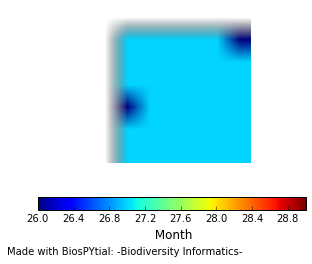

In [23]:
t1.associatedData.getAssociatedRasterAreaData('MeanTemperature').display_field()

#### Explore array with numpy

# Rank co-occurrent Nodes

For this we will calculate the frequency of each Node in the big tree, using another list of trees. In this case the sample of trees that we've got.

In [24]:
big_t.countNodesFrequenciesOnList(list_of_trees=sample_trees)

INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.6
INFO Going deep 0.6
INFO Going deep 0.6
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.6
INFO Going deep 0.2


0.05

In [25]:
big_t.rankLevels()

INFO Sorting nodes in taxonomic levels by counts on frequencies


True

In [26]:
big_t.families[:5]

[<LocalTree | Family: Picidae - n.count : 6- | AF: 0.6 >,
 <LocalTree | Family: Parulidae - n.count : 17- | AF: 0.6 >,
 <LocalTree | Family: Icteridae - n.count : 14- | AF: 0.6 >,
 <LocalTree | Family: Fabaceae - n.count : 5- | AF: 0.6 >,
 <LocalTree | Family: Columbidae - n.count : 21- | AF: 0.6 >]

### And for mammals ?

In [27]:
mammals.countNodesFrequenciesOnList(sample_trees)

INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.6
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.2
INFO Going deep 0.4
INFO Going deep 0.8
INFO Going deep 1.0
INFO Going deep 1.0


0.05

In [28]:
mammals.rankLevels()

INFO Sorting nodes in taxonomic levels by counts on frequencies


True

In [29]:
mammals.orders[:5]

[<LocalTree | Order: Chiroptera - n.count : 27- | AF: 0.6 >,
 <LocalTree | Order: Rodentia - n.count : 67- | AF: 0.4 >,
 <LocalTree | Order: Carnivora - n.count : 6- | AF: 0.2 >,
 <LocalTree | Order: Lagomorpha - n.count : 1- | AF: 0.2 >]

# Graph analytics

## Convert the TreeNeo object to a Network instance (networkx)
### The depth_level restricts the depth of the recursion process.

In [30]:
gt = big_t.toNetworkx(depth_level=7)

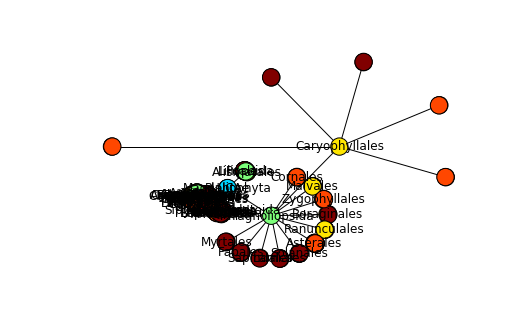

In [31]:
## Plot the Tree
from drivers.tools import plotTree
x = plotTree(big_t)

## Standard Graph analysis
With the **networkx** library

In [32]:
import networkx as nt
lap =nt.laplacian_matrix(gt)

In [33]:
sp = nt.laplacian_spectrum(gt)

In [34]:
sp.shape

(474,)

## Distance to species

In [35]:
from drivers.graph_models import Root

In [36]:
ss = big_t.species[0]

In [72]:
species = map(lambda l : l.node , list(big_t.species))

In [73]:
pairs = [(a,b) for a in species for b in species]

In [75]:
## Taxonomic distance doesn't use information of the graph restricted to the location. 
##Only to the taxonomic structure
dist = lambda (a,b) : a.taxonomicDistanceTo(b)

In [76]:
%time distancias = map(dist,pairs)

CPU times: user 1min 9s, sys: 12 ms, total: 1min 9s
Wall time: 1min 9s


In [77]:
distancias = np.array(distancias).reshape(len(genera),len(genera))


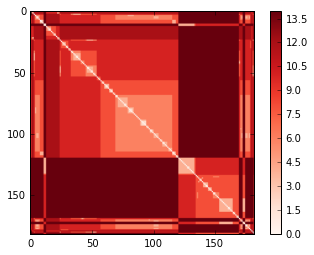

In [78]:
plt.imshow(distancias,cmap=plt.cm.Reds)
plt.colorbar()

I need to replace the root node because is treeneo and it should be localtree
After this we will have the shortestpath with attribute n_presences list guaja guaajajajajaj!!!

In [79]:
lynx = lambda (a,b) : a.mergeLinageWithNode(b)

In [80]:
%time linages = map(lynx,pairs)

CPU times: user 1min, sys: 344 ms, total: 1min
Wall time: 1min


## Here we will use the general graph to extract shortest paths and attributes. 
The attributes extracted are related to the geographical context and therefore they are defined in the LocalTree class which extends the TreeNode class (is a super class of LocalTree).
When the graph is built 'gt' 

In [82]:
## With the graph object
pathsf = lambda (a,b) : nt.shortest_path(gt,a,b)
%time paths = map(pathsf,pairs)

CPU times: user 55.5 s, sys: 16 ms, total: 55.5 s
Wall time: 55.6 s


In [83]:
paths[1] == linages[1]

False

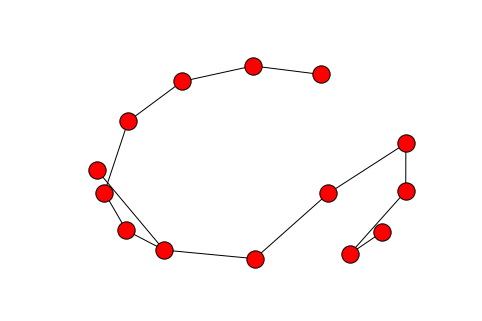

In [84]:
nt.draw(linages[1])

In [85]:
ppp1 = nt.shortest_path(linages[1],pairs[1][0],pairs[1][1])

In [86]:
ppp1 == paths[1]

True

In [87]:
paths[1]

[<TreeNode type: Specie id = 2478081 name: Melanerpes aurifrons (Wagler, 1829)>,
 <TreeNode type: Genus id = 2478067 name: Melanerpes>,
 <TreeNode type: Family id = 9333 name: Picidae>,
 <TreeNode type: Order id = 724 name: Piciformes>,
 <TreeNode type: Class id = 212 name: Aves>,
 <TreeNode type: Phylum id = 44 name: Chordata>,
 <TreeNode type: Kingdom id = 1 name: Animalia>,
 <TreeNode type: Phylum id = 54 name: Arthropoda>,
 <TreeNode type: Class id = 281 name: Branchiopoda>,
 <TreeNode type: Order id = 1159 name: Notostraca>,
 <TreeNode type: Family id = 2235047 name: Triopsidae>,
 <TreeNode type: Genus id = 2235057 name: Triops>,
 <TreeNode type: Specie id = 2235060 name: Triops longicaudatus (LeConte, 1846)>]

In [96]:
freqs = nt.get_node_attributes(gt,'freq')
richness = nt.get_node_attributes(gt,'richness')
level  = nt.get_node_attributes(gt,'level')




In [155]:
def modifiedDistance(path):
    extractFreqsFromPath = lambda path : map(lambda node : freqs[node],path)
    extractRichnessFromPath = lambda path : map(lambda node : richness[node],path)
    extractLevelFromPath = lambda path : map(lambda node : level[node],path)
    dat = pd.DataFrame({'freq' : extractFreqsFromPath(path),'rich':extractRichnessFromPath(path),'level':extractLevelFromPath(path)})
    dat['level'] = dat.level + 1
    dat['fl'] = dat.freq / dat.level
    
    return dat.sum()

In [156]:
test1 = modifiedDistance(pp1)

In [157]:
%time distances_m = map(lambda path : modifiedDistance(path),paths)

CPU times: user 1min 20s, sys: 24 ms, total: 1min 20s
Wall time: 1min 20s


In [158]:
distances_m = pd.DataFrame(distances_m)

In [159]:
n = len(species)

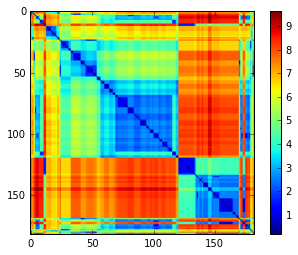

In [164]:
plt.imshow(distances_m.freq.values.reshape(n,n))
plt.colorbar()

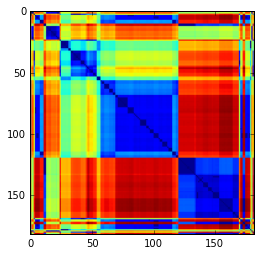

In [161]:
plt.imshow(distances_m.rich.values.reshape(n,n))

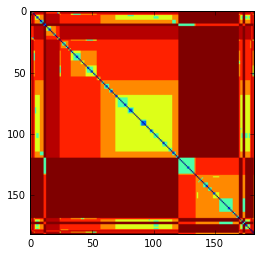

In [162]:
plt.imshow(distances_m.level.values.reshape(n,n))

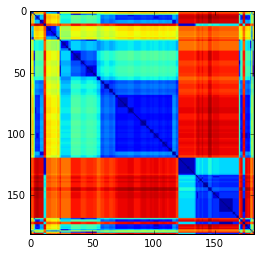

In [163]:
plt.imshow(distances_m.fl.values.reshape(n,n))

In [91]:
map(lambda n : freqs[n],pp1)

[0.6, 0.6, 0.6, 0.6, 0.8, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.4]

In [71]:
p0.__dict__

{'_GraphObject__ogm': <py2neo.ogm.OGM at 0x7f0c68bda190>}

In [ ]:
nn1 = big_t.species[0]

In [ ]:
l1.edges()

In [ ]:
from drivers.tree_builder import LocalTree

In [ ]:
type(big_t.node)

In [ ]:
isinstance(big_t.node,TreeNeo)

In [ ]:
ed1 = gt.edges()[0]

In [ ]:
nt.Graph.add_edge?

In [ ]:
nt.Graph().add_edge

In [ ]:
dist2 = lambda (a,b) : nt.shortest_path_length(gt,a,b,weight='freq')

In [ ]:
%time distancias = map(dist2,pairs)

In [ ]:
distancias = np.array(distancias).reshape(len(genera),len(genera))

In [ ]:
plt.imshow(distancias,cmap=plt.cm.Reds)
plt.colorbar()

In [ ]:
nodes = gt.nodes()

In [ ]:
from drivers.graph_models import TreeNode
root = filter(lambda a : not isinstance(a,TreeNode),nodes).pop()

In [ ]:
gt.remove_node(root)

In [ ]:
nt.get_edge_attributes(gt,name='freq')

In [ ]:
type(big_t.node.node)

In [ ]:
distancias = np.array(distancias).reshape(len(genera),len(genera))
plt.imshow(distancias)
plt.colorbar()

In [ ]:
g.node.ta

In [ ]:
g = genera[0]
dist = []
for node in genera:
    print("calculating distance")
    %time dist.append(node.mergeLinageWithNode(g))
    
#cosas = map(lambda n : g.taxonomicDistanceTo(n),genera)

In [ ]:
distances = []
for specie in big_t.species:
    distances.append(map(lambda sp : specie.node.taxonomicDistanceTo(sp.node),big_t.species))
    

In [ ]:
import pandas as pd
sp_dist_table = pd.DataFrame(distances)


In [ ]:
### Export to R
x = table.to_json()
from drivers.tools import redisConnection as rc
r = rc()
r.set('spatstats2017',x)
r.keys()